# Model training

## Data and Required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Read CSV

In [11]:
df = pd.read_csv('data/processed_stud.csv')

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,43.6
1,female,group C,some college,standard,completed,69,90,88,247,49.4
2,female,group B,master's degree,standard,none,90,95,93,278,55.6
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,29.6
4,male,group C,some college,standard,none,76,78,75,229,45.8


#### Split features and target (average_score)

##### Features

In [13]:
X = df.drop(columns=['average_score'], axis=1)

In [14]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


##### Target

In [15]:
y = df['average_score']

In [16]:
y.head()

0    43.6
1    49.4
2    55.6
3    29.6
4    45.8
Name: average_score, dtype: float64

#### Prepocessing Pipeline

In [23]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

prepocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]

)

In [24]:
X = prepocessor.fit_transform(X)

In [30]:
prepocessor.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['math_score', 'reading_score', 'writing_score', 'total_score'], dtype='object'))])>

#### Split train test

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    test_size=0.2)

In [44]:
X_test.shape

(200, 21)

In [45]:
print(f"Train featuresshape : {X_train.shape}\nTrain target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}\nTest target shape: {y_test.shape}")

Train featuresshape : (800, 21)
Train target shape: (800,)
Test features shape: (200, 21)
Test target shape: (200,)


#### Evaluate Fonction

##### Metrics

In [46]:
def evaluate_model(true_value, predicted_value):
    
    mae = mean_absolute_error(true_value, predicted_value)
    mse = mean_squared_error(true_value, predicted_value)
    rmse = np.sqrt(mean_squared_error(true_value, predicted_value))
    r2_square = r2_score(true_value, predicted_value)

    return mae, mse, rmse, r2_square

##### Train - Predict - Evaluate

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=0),
    "Ada Boost Regressor": AdaBoostRegressor()
}


model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Mean Squared Error: 1.0181
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9858
----------------------------------
Model performance for Test set
- Mean Squared Error: 1.1146
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9856


Ridge
Model performance for Training set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0035
- Mean Absolute Error: 0.0029
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0039
- Mean Absolute Error: 0.0029
- R2 Score

##### Choose Model

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
4,Decision Tree Regressor,0.997836
6,XGBoost Regressor,0.997430
5,Random Forest Regressor,0.996040
7,CatBoosting Regressor,0.994941
8,Ada Boost Regressor,0.992472
1,Lasso,0.985557
3,K-Neighbors Regressor,0.966842


#### Linear Regression

In [51]:
lin_model = LinearRegression(fit_intercept=True)

lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


#### Plot True target and predicted target

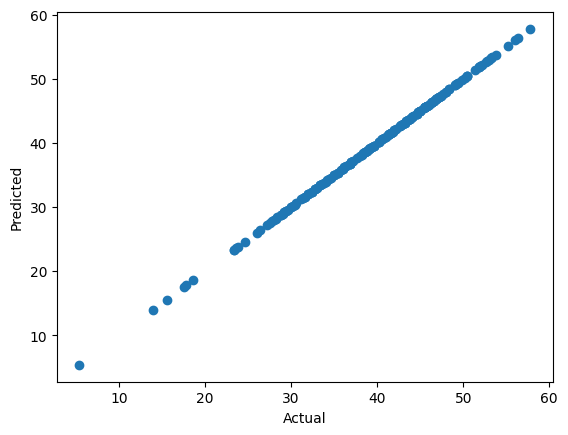

In [52]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

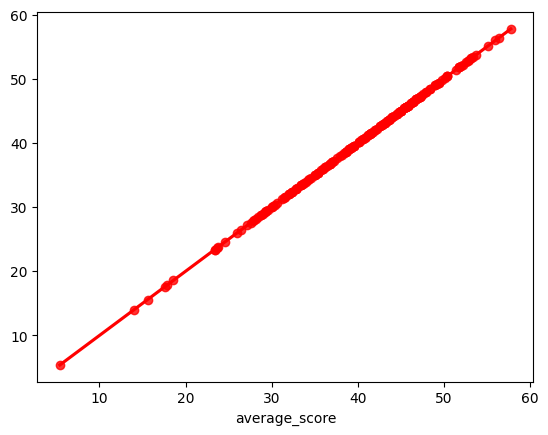

In [53]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':round((y_test-y_pred), 4)})
pred_df

,Actual Value,Predicted Value,Difference
521,52.2,52.2,0.0
737,38.4,38.4,0.0
740,45.0,45.0,0.0
660,44.8,44.8,0.0
411,49.0,49.0,0.0
...,...,...,...
408,33.0,33.0,0.0
332,34.2,34.2,0.0
208,46.2,46.2,0.0
613,43.2,43.2,0.0
